<a href="https://colab.research.google.com/github/ZohanaZuthi/1st-project/blob/main/Suppeort_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suppeort Vector Regression**

## **Import the Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Import Dataset**

In [ ]:
dataset=pd.read_csv('Position_Salaries.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


now we want the y to be represented vertically . so we will use reshape function with two parameters where the first one is length of row, and the second one is column

In [ ]:
y=y.reshape(len(y),1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## **Feature Scaling**

feature scalling is applied on those function where the dependent variable and independent variable has implicit relationship. So linear regression of all kind doesn't need any feature scaling

Feature scaling is a technique in machine learning used to normalize or standardize the range of independent variables or features. It helps ensure that all features contribute equally to the model and prevents models from being biased toward variables with larger values. Feature scaling is important for algorithms that calculate distances between data points (like K-nearest neighbors or support vector machines) or are sensitive to feature magnitude (like gradient descent-based models).

if the values ar limited to 0 and 1 we don;t need feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)
# here we applied feature scaling on both x and y because both will have different mean and standard deviation

In [ ]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


preproccessing usully tranform the data in between -3 to +3

## **Training the SVR model on the whole dataset**

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
# rbf kernel is a non linear kernel
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

RBF kernel: It’s a non-linear kernel used when the relationship between the input features and the target variable is not linear. This kernel transforms the input data into a higher-dimensional space where it can create a more complex decision boundary for regression.

The fit() method optimizes the model parameters based on the training data, identifying the support vectors (critical data points that define the boundary) and the regression function that best predicts the target values.

## **Predicting the result**

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[252789.13921624]])

predict method always expects input in 2D array

## **Visualizing the SVR result**

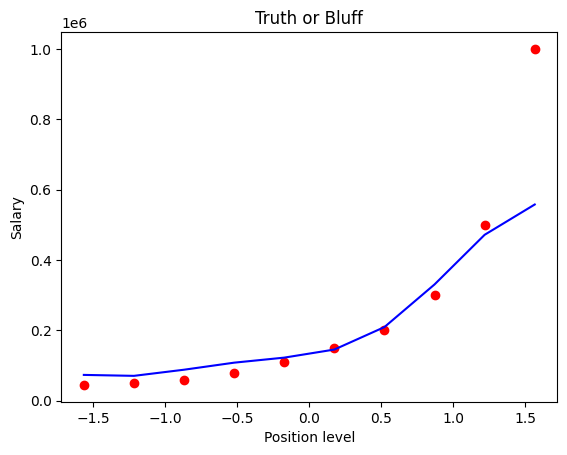

In [ ]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## **Visualizing the SVR results (for higher resolution and smoother curve)**

<ipython-input-28-7e4a052ada27>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)


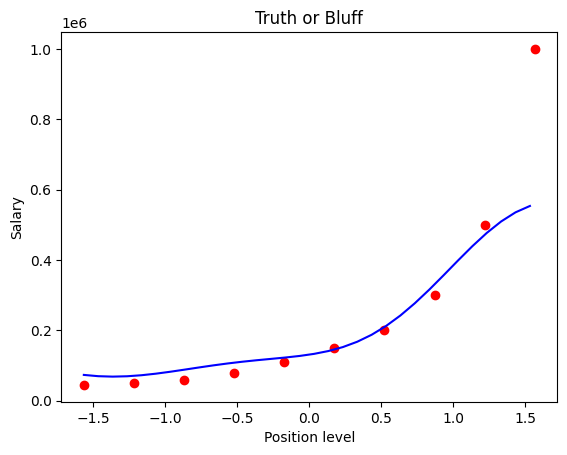

In [ ]:
x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()